### Question 4

In [1]:
pip install qutip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

#### Part a)

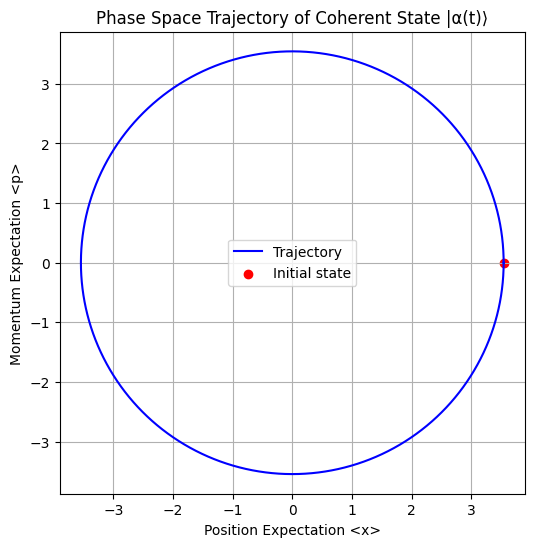

In [3]:
omega = 2 * np.pi 
m = 1  
hbar = 1

N = 20
a = destroy(N)
a_dag = create(N)

# Hamiltonian H_0 = ħω(a†a + 1/2)
H_0 = hbar * omega * (a.dag() * a + 1/2)

# coherent state |α⟩ with α = 1
alpha = 1

coherent_state = (displace(N, alpha) * basis(N, 0))

# time evolution operator U(t) function
def time_evolution_operator(t):
    return (-1j * H_0 * t / hbar).expm()

T = 2 * np.pi / omega 
times = np.linspace(0, T, 1000)

# calculate the time-evolved states |α(t)⟩ = U(t)|α⟩
alpha_t_states = [time_evolution_operator(t) * coherent_state for t in times]

x = (np.sqrt(hbar / 2 * m * omega))  * (a + a.dag()) # position operator
p = (1j * np.sqrt(m * hbar * omega / 2)) * (a.dag() - a)  # momentum operator

x_expectation_values = [expect(x, state) for state in alpha_t_states]
p_expectation_values = [expect(p, state) for state in alpha_t_states]

# Plot the expectation values in the phase space
plt.figure(figsize=(6, 6))
plt.plot(x_expectation_values, p_expectation_values, 'b-', label='Trajectory')
plt.scatter(x_expectation_values[0], p_expectation_values[0], color='red', label='Initial state')
plt.xlabel('Position Expectation <x>')
plt.ylabel('Momentum Expectation <p>')
plt.title('Phase Space Trajectory of Coherent State |α(t)⟩')
plt.legend()
plt.axis('equal')
plt.grid()
plt.show()


#### Part b)

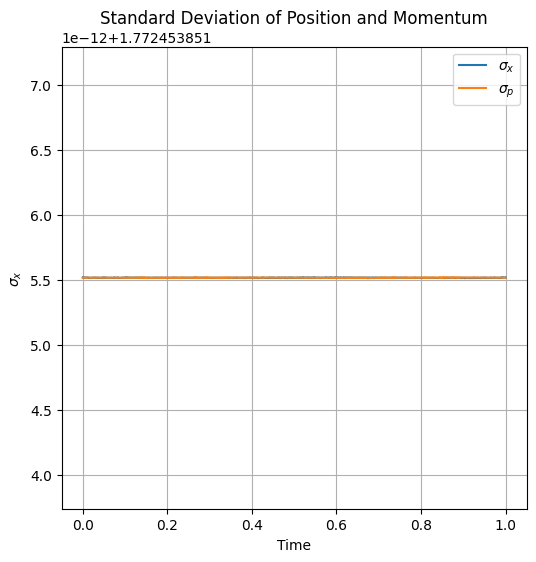

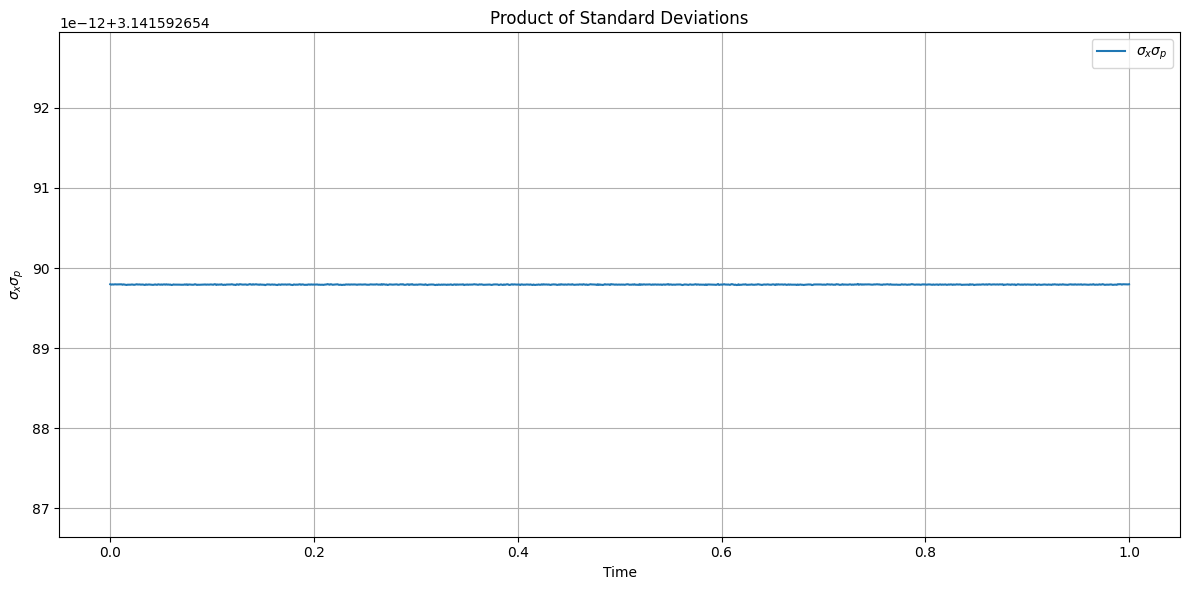

In [4]:
x_expect = np.array([expect(x, state) for state in alpha_t_states])
x2_expect = np.array([expect(x**2, state) for state in alpha_t_states])

p_expect = np.array([expect(p, state) for state in alpha_t_states])
p2_expect = np.array([expect(p**2, state) for state in alpha_t_states])

# calculate standard deviations
sigma_x = np.sqrt(x2_expect - x_expect**2)
sigma_p = np.sqrt(p2_expect - p_expect**2)
sigma_xp = sigma_x * sigma_p

# plot standard deviations and their product over time
plt.figure(figsize=(6, 6))
plt.plot(times, sigma_x, label=r'$\sigma_x$')
plt.plot(times, sigma_p, label=r'$\sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x$')
plt.title('Standard Deviation of Position and Momentum')
plt.grid(True)
plt.legend()
plt.show()

# Plot sigma_x * sigma_p
plt.figure(figsize=(12, 6))
plt.plot(times, sigma_xp, label=r'$\sigma_x \sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.title('Product of Standard Deviations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



#### Part c)

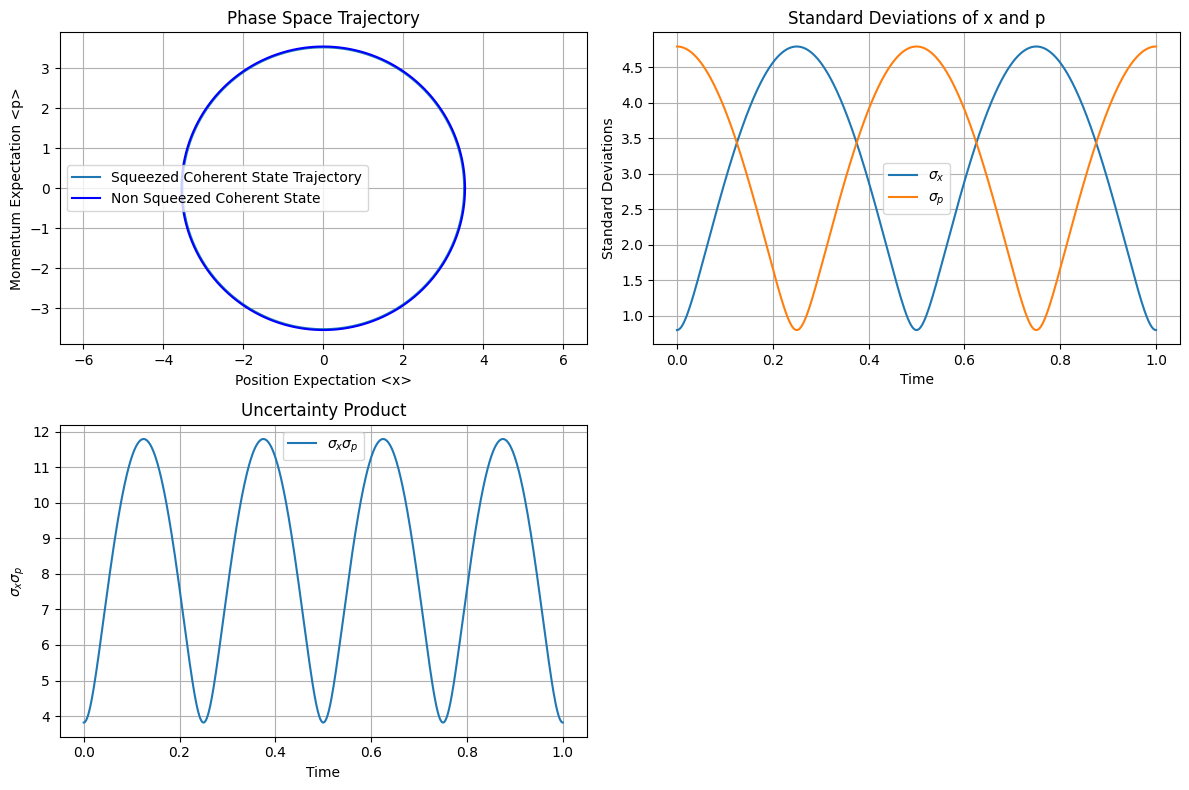

In [5]:
r = 1  # Squeeze parameter r
z = r  # QuTiP uses z for the squeeze parameter r

squeezed_vacuum = squeeze(N, z) * basis(N, 0)
squeezed_coherent_state = displace(N, alpha) * squeezed_vacuum

squeezed_alpha_t_states = [time_evolution_operator(t) * squeezed_coherent_state for t in times]

squeezed_x_expect = np.array([expect(x, squeezed_coherent_state) for squeezed_coherent_state in squeezed_alpha_t_states])
squeezed_x2_expect = np.array([expect(x**2, squeezed_coherent_state) for squeezed_coherent_state in squeezed_alpha_t_states])

squeezed_p_expect = np.array([expect(p, squeezed_coherent_state) for squeezed_coherent_state in squeezed_alpha_t_states])
squeezed_p2_expect = np.array([expect(p**2, squeezed_coherent_state) for squeezed_coherent_state in squeezed_alpha_t_states])

# calculate standard deviations
squeezed_sigma_x = np.sqrt(squeezed_x2_expect - squeezed_x_expect**2)
squeezed_sigma_p = np.sqrt(squeezed_p2_expect - squeezed_p_expect**2)
squeezed_sigma_xp = squeezed_sigma_x * squeezed_sigma_p

# Plotting
plt.figure(figsize=(12, 8))

# expectation values in the phase space
plt.subplot(2, 2, 1)
plt.plot(expect(x, squeezed_alpha_t_states), expect(p, squeezed_alpha_t_states), label='Squeezed Coherent State Trajectory')
plt.plot(x_expectation_values, p_expectation_values, 'b-', label='Non Squeezed Coherent State')

plt.xlabel('Position Expectation <x>')
plt.ylabel('Momentum Expectation <p>')
plt.title('Phase Space Trajectory')
plt.legend()
plt.axis('equal')
plt.grid(True)

# standard deviations of x and p
plt.subplot(2, 2, 2)
plt.plot(times, squeezed_sigma_x, label=r'$\sigma_x$')
plt.plot(times, squeezed_sigma_p, label=r'$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Standard Deviations')
plt.title('Standard Deviations of x and p')
plt.legend()
plt.grid(True)

# product of standard deviations
plt.subplot(2, 2, 3)
plt.plot(times, squeezed_sigma_xp, label=r'$\sigma_x \sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.title('Uncertainty Product')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### Part d)

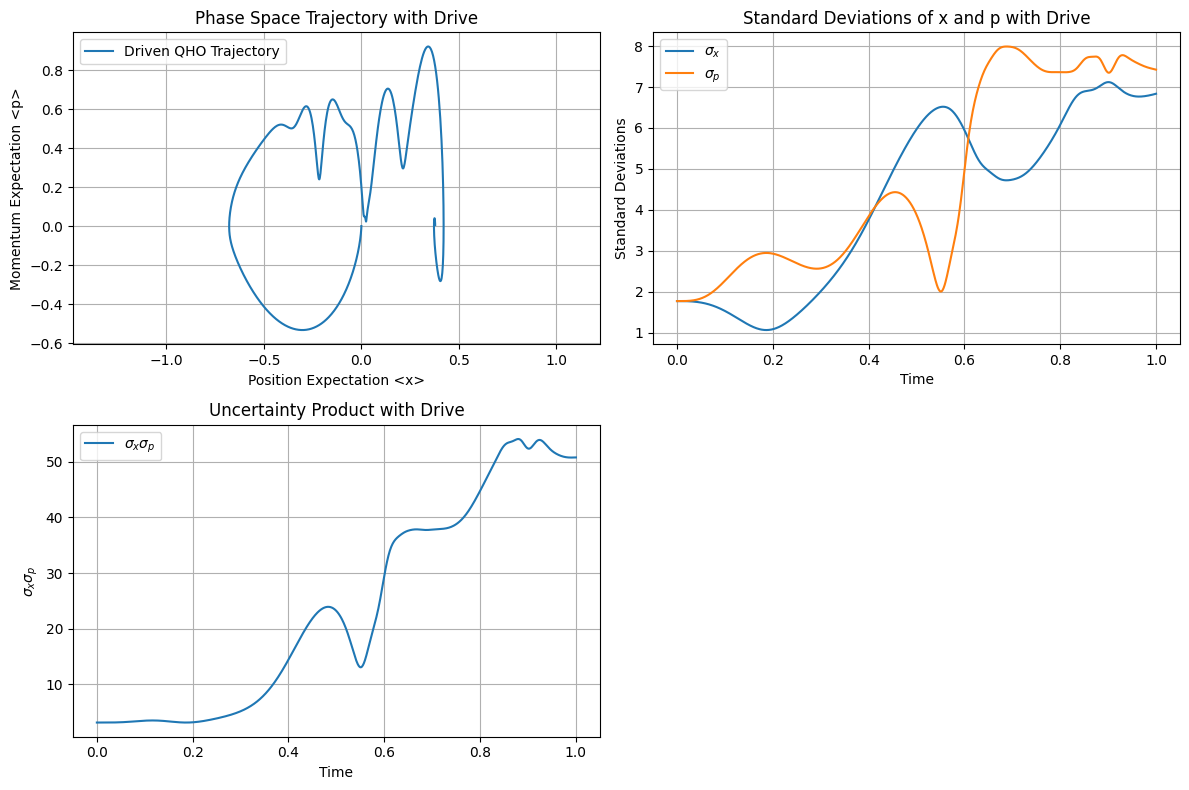

In [6]:
beta1 = 1
beta2 = 1
fock_state = fock(N, 0)

def drive1_coeff(t, args):
    return beta1 * np.sin(2 * omega * t)

def drive2_coeff(t, args):
    return beta2 * np.sin(2 * omega * t)

H_drive1 = [x, drive1_coeff]
H_drive2 = [x**2, drive2_coeff]

# complete Hamiltonian with the drive
H = [H_0, H_drive1, H_drive2]

# solve the time-dependent schrodinger equation
result = sesolve(H, fock_state, times)

# calculate expectation values and uncertainties for x and p
x_expectation_values = expect(x, result.states)
p_expectation_values = expect(p, result.states)
sigma_x = np.sqrt(expect(x**2, result.states) - x_expectation_values**2)
sigma_p = np.sqrt(expect(p**2, result.states) - p_expectation_values**2)
sigma_xp = sigma_x * sigma_p


# expectation values in phase space
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x_expectation_values, p_expectation_values, label='Driven QHO Trajectory')
plt.xlabel('Position Expectation <x>')
plt.ylabel('Momentum Expectation <p>')
plt.title('Phase Space Trajectory with Drive')
plt.legend()
plt.axis('equal')
plt.grid(True)

# standard deviations of x and p
plt.subplot(2, 2, 2)
plt.plot(times, sigma_x, label=r'$\sigma_x$')
plt.plot(times, sigma_p, label=r'$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Standard Deviations')
plt.title('Standard Deviations of x and p with Drive')
plt.legend()
plt.grid(True)

# product of standard deviations
plt.subplot(2, 2, 3)
plt.plot(times, sigma_xp, label=r'$\sigma_x \sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.title('Uncertainty Product with Drive')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Part E Setting B1 to 0
​
Eliminates the linear driving force, leaving only the quadratic term in the potential. This term alone causes a time-dependent change in the curvature of the potential experienced by the oscillator, causing squeezing along one axis and stretched along the other, alternating with time according to the sin(2ωt) term

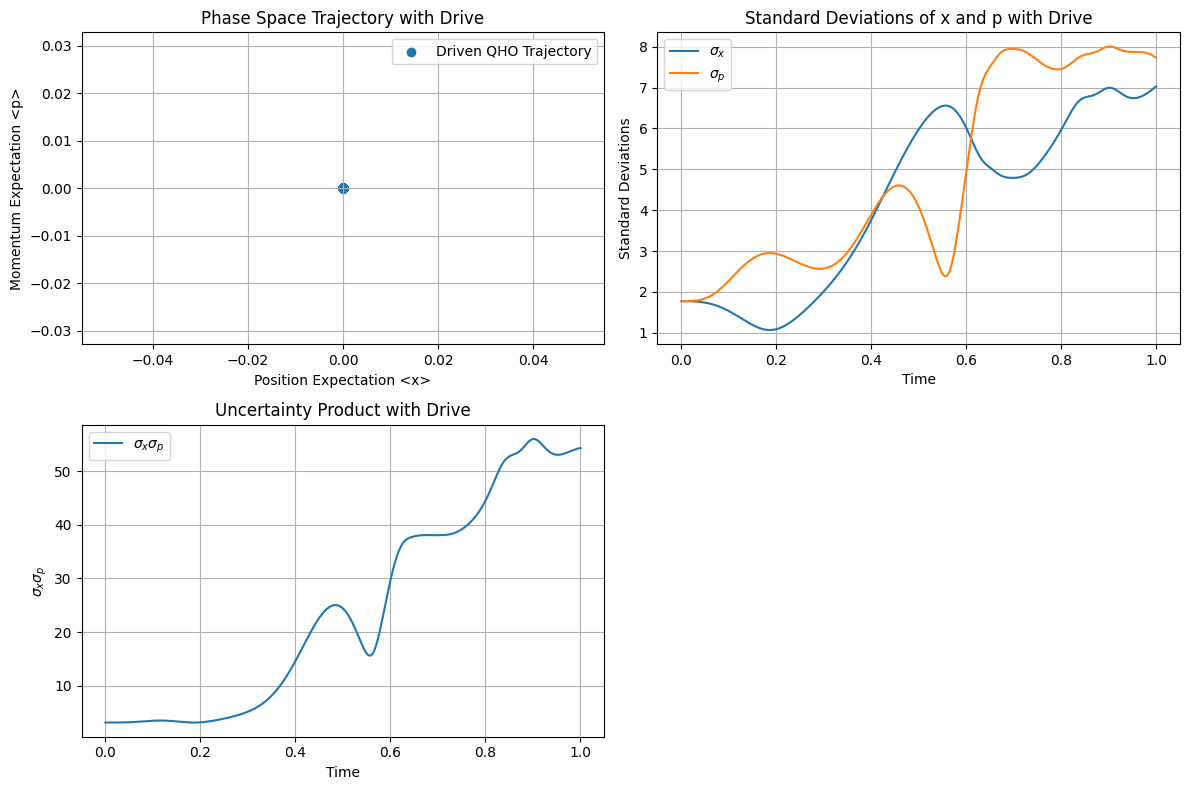

In [7]:
beta1 = 0
beta2 = 1
fock_state = fock(N, 0)

def drive1_coeff(t, args):
    return beta1 * np.sin(2 * omega * t)

def drive2_coeff(t, args):
    return beta2 * np.sin(2 * omega * t)

H_drive1 = [x, drive1_coeff]
H_drive2 = [x**2, drive2_coeff]

# complete Hamiltonian with the drive
H = [H_0, H_drive1, H_drive2]
# solve the time-dependent schrodinger equation
result_01 = sesolve(H, fock_state, times)

# calculate expectation values and uncertainties for x and p
x_expectation_values = expect(x, result_01.states)
p_expectation_values = expect(p, result_01.states)
sigma_x = np.sqrt(expect(x**2, result_01.states) - x_expectation_values**2)
sigma_p = np.sqrt(expect(p**2, result_01.states) - p_expectation_values**2)
sigma_xp = sigma_x * sigma_p

# expectation values in phase space
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(x_expectation_values, p_expectation_values, label='Driven QHO Trajectory')
plt.xlabel('Position Expectation <x>')
plt.ylabel('Momentum Expectation <p>')
plt.title('Phase Space Trajectory with Drive')
plt.legend()
plt.axis('equal')
plt.grid(True)

# standard deviations of x and p
plt.subplot(2, 2, 2)
plt.plot(times, sigma_x, label=r'$\sigma_x$')
plt.plot(times, sigma_p, label=r'$\sigma_p$')
plt.xlabel('Time')
plt.ylabel('Standard Deviations')
plt.title('Standard Deviations of x and p with Drive')
plt.legend()
plt.grid(True)

# product of standard deviations
plt.subplot(2, 2, 3)
plt.plot(times, sigma_xp, label=r'$\sigma_x \sigma_p$')
plt.xlabel('Time')
plt.ylabel(r'$\sigma_x \sigma_p$')
plt.title('Uncertainty Product with Drive')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
